# Harmonic Oscillator Case

The Hamiltonian system 
$$H(q,p)=\frac{1}{2}p^{T}p+U(q)$$
where  $\quad\quad U(q)=\frac{1}{2}\omega^2q^2$
$$\dot{p}=f(q)=-\nabla U(q)=-\omega^2 q$$ $$\dot{q}=p$$

Suppose $\omega=1$, 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
from IPython.display import HTML
plt.rcParams["figure.figsize"] = (6,4.5) # adjusts plot dimension parameters
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["font.sans-serif"] = ['Tahoma'] # changes font

In [2]:
def U(q): # potential energy
    omega = 2
    return 0.5 * omega**2 * q**2

In [3]:
def f(q): # force = -gradient(U(q))
    omega = 2
    return -omega**2 * q

In [4]:
def Verlet(q,p,h, force_function):
    
     # Compute the force
    f = force_function(q)
    
    # Do the update 
    pt_1 = p + h/2 * f
    qt = q + h * pt_1
    
    # Compute the new energies
    f_new = force_function(qt)
    pt = pt_1 + h/2 * f_new
    
    ke = np.dot(pt,pt) / 2
    pe = U(qt)
    
    # Total energy is kinetic + potential
    total_e = ke + pe 
        
    return qt, pt, total_e 

In [5]:
# Simplified Takahashi-Imada
def S_T_I(q,p,h, force_function):
    
     # Compute the force
    alpha = 1/12
    f1 = force_function(q)
    f2 = force_function(q + alpha * h**2 * f1)
    
    # Do the update 
    pt_1 = p + h/2 * f2
    qt = q + h * pt_1
    
    # Compute the new energies
    f3 = force_function(qt)
    f4 = force_function(qt + alpha * h**2 * f3)
    
    pt = pt_1 + h/2 * f4
    
    ke = np.dot(pt,pt) / 2
    pe = U(qt)
    
    # Total energy is kinetic + potential
    total_e = ke + pe
       
    return qt, pt, total_e 

$$f'(q)=-\omega^2$$

In [6]:
# Takahashi-Imada
def T_I(q,p,h, force_function):
    alpha = 1/12
    omega = 2
    
    f_deri = -omega**2 # derivative of the force = 2nd derivative of -U, constant
    f1 = force_function(q)

    pt_1 = p + (h/2)*(f1+alpha*h**2*f_deri*f1)
    
    qt = q + h*pt_1
    
    f2 = force_function(qt)
    pt = pt_1 + (h/2)*(f2+alpha*h**2*f_deri*f2)
    
    ke = np.dot(pt,pt) / 2
    pe = U(qt)
    
    total_e = ke + pe
    return qt, pt, total_e

In [7]:
# 4th order Yoshida method
def Yoshida(q0, p0, h, force_function):

    tau0 = 1 / (2 - 2**(1/3))
    tau1 = -2**(1/3) / (2 - 2**(1/3))
    
    q1, p1, _ = Verlet(q0, p0, h*tau0, force_function)
    q2, p2, _ = Verlet(q1, p1, h*tau1, force_function)
    qt, pt, total_e = Verlet(q2, p2, h*tau0, force_function)
    
    return qt, pt, total_e

In [8]:
def run_simulation(q0, p0, Nsteps, h, step_function, force_function):
    
    q_traj = [] 
    p_traj = [] 
    e_traj = [] 
    t_traj = []

    # Set initial conditions
    q = np.copy(q0)
    p = np.copy(p0)
    t = 0

    # Main loop for timestepping
    for n in range(Nsteps):
        
        q,p,energy = step_function(q, p, h, force_function)
        t = t + h 

        q_traj += [q] 
        p_traj += [p] 
        e_traj += [energy] 
        t_traj += [t] 

    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj) 

    return q_traj, p_traj, e_traj, t_traj

In [9]:
# numerical experiment
q0 = 0
p0 = 1
T = 100
h = 0.2 # Stepsize, used 0.2 bc 0.05 was too boring
Nsteps = int(T/h) # Number of steps

q_traj3, p_traj, e_traj3, t_traj = run_simulation(q0, p0, Nsteps, h, Verlet, f)
q_traj4, p_traj, e_traj4, t_traj = run_simulation(q0, p0, Nsteps, h, S_T_I, f)
q_traj5, p_traj, e_traj5, t_traj = run_simulation(q0, p0, Nsteps, h, T_I, f)
q_traj6, p_traj, e_traj6, t_traj = run_simulation(q0, p0, Nsteps, h, Yoshida, f)

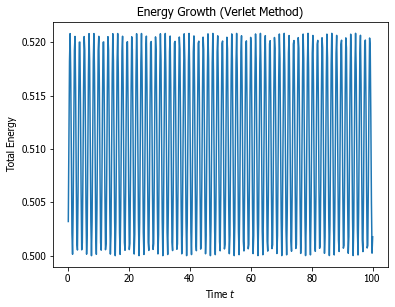

In [10]:
plt.plot(t_traj, e_traj3, label = 'Verlet',color = "tab:blue")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Verlet Method)')
plt.savefig('EG-3a.png')
plt.show()

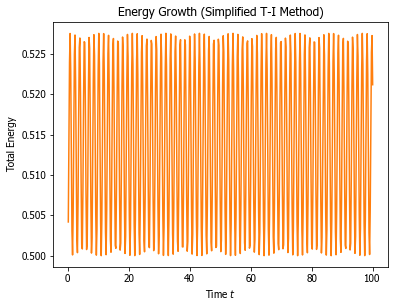

In [11]:
plt.plot(t_traj, e_traj4, label = 'S-T-I', color = "tab:orange")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Simplified T-I Method)')
plt.savefig('EG-3b.png')
plt.show()

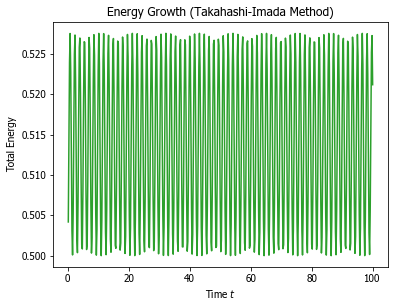

In [12]:
plt.plot(t_traj, e_traj5, label = 'T-I', color = "tab:green")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Takahashi-Imada Method)')
plt.savefig('EG-3c.png')
plt.show()

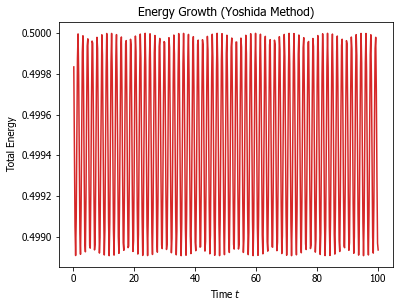

In [13]:
plt.plot(t_traj, e_traj6, label = 'Yoshida',color = "tab:red")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Yoshida Method)')
plt.savefig('EG-3d.png')
plt.show()

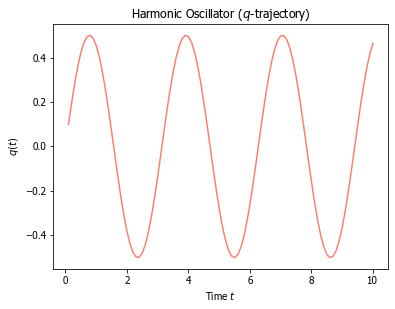

In [14]:
h = 0.1 # Stepsize
T = 10
Nsteps = 100 # Number of steps
Nsteps = int(T/h)
q_traj, p_traj, e_traj, t_traj = run_simulation( q0,p0, Nsteps, h, Verlet, f)
plt.plot(t_traj, q_traj, 'salmon')
plt.xlabel('Time $t$')
plt.ylabel('$q(t)$')
plt.title('Harmonic Oscillator ($q$-trajectory)')
plt.savefig('harm_osc_qtraj.png')
plt.show()

# max energy difference

In [15]:
def Find_Traj(h,T,step_function,force_function):
    '''
    This function takes step size and time as input and using Euler's method it returns 
    corresponding trajectory arrays for q and p.
    '''

    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.copy(q0)
    p = np.copy(p0)
    t = 0 #t0

    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        t = t + h
        q,p,energy = step_function(q, p, h, force_function)

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [energy] 

    # Make these into numpy arrays
    q_traj = np.array(q_traj)
    p_traj = np.array(p_traj)
    
    return q_traj,p_traj

def total_energy(q,p):
    pe = U(q)
    ke =  np.dot(p,p) / 2
    e = pe + ke
    return e
    
def Find_MaxDif(q_traj,p_traj,h,T):
    '''
    This function takes trajectory arrays, step size and time and returns the maximum energy difference
    of the arrays (a scalar).
    '''
    Nsteps = int(T / h)
    energydifvec = np.zeros(Nsteps)
    
    for i in range(Nsteps):
        energydifvec[i] = abs(total_energy(q0,p0)-total_energy(q_traj[i],p_traj[i]))
        
    return max(energydifvec)

In [16]:
q0 = 0
p0 = 1
T = 10
h = np.arange(0.001,0.1,0.001)
h_len = len(h)
maxvecSE = np.zeros(h_len)
maxvecV = np.zeros(h_len)
maxvecSTI = np.zeros(h_len)
maxvecTI = np.zeros(h_len)
maxvecY = np.zeros(h_len)

# loop over stepsizes h
for i in range(h_len):
    # saving the trajectory arrays corresponding to a particular step size into new variables
    q_trajV,p_trajV = Find_Traj(h[i],T,Verlet,f)
    q_trajSTI,p_trajSTI = Find_Traj(h[i],T,S_T_I,f)
    q_trajTI,p_trajTI = Find_Traj(h[i],T,T_I,f)
    q_trajY,p_trajY = Find_Traj(h[i],T,Yoshida,f)

    # saving the maximum value for each h in the vector of max energy differences
    maxvecV[i] = Find_MaxDif(q_trajV,p_trajV,h[i],T)
    maxvecSTI[i] = Find_MaxDif(q_trajSTI,p_trajSTI,h[i],T)
    maxvecTI[i] = Find_MaxDif(q_trajTI,p_trajTI,h[i],T)
    maxvecY[i] = Find_MaxDif(q_trajY,p_trajY,h[i],T)

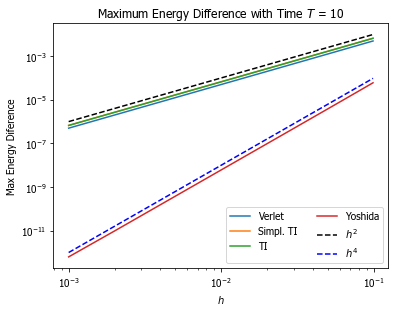

In [17]:
# the same as before, but shown that they are of O(h^2) (in the loglog scale)
plt.loglog(h,maxvecV,label="Verlet",color="tab:blue")
plt.loglog(h,maxvecSTI,label="Simpl. TI",color="tab:orange")
plt.loglog(h,maxvecTI,label="TI",color="tab:green")
plt.loglog(h,maxvecY,label="Yoshida",color="tab:red")
plt.loglog(h,h**2,'--k',label="$h^2$")
plt.loglog(h,h**4,'--b',label="$h^4$")

plt.xlabel('$h$')
plt.ylabel('Max Energy Diference') 
plt.title('Maximum Energy Difference with Time $T$ = 10')
plt.legend(ncol = 2)
plt.savefig('harm_osc_all.png')
plt.show()

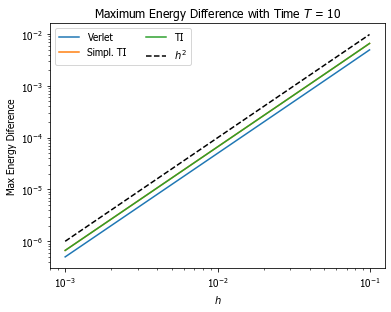

In [18]:
plt.loglog(h,maxvecV,label="Verlet",color="tab:blue")
plt.loglog(h,maxvecSTI,label="Simpl. TI",color="tab:orange")
plt.loglog(h,maxvecTI,label="TI",color="tab:green")
plt.loglog(h,h**2,'--k',label="$h^2$")

plt.xlabel('$h$')
plt.ylabel('Max Energy Diference') 
plt.title('Maximum Energy Difference with Time $T$ = 10')
plt.legend(ncol = 2)
plt.savefig('harm_osc_order 2.png')
plt.show()